In [3]:
import csv
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [15]:
output_dir = '/home/dayn/data/lung_on_chip/pos_neg_dist/co-culture/iVECs+iAT2AT1/Folder_20220808/A2-A5/analysis_20221125/DAPI-SPC-PDPN-ZO1/_20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_60_/images/jakson' # '/home/dayn/data/lung_on_chip/pos_neg_dist/jakson'

In [16]:
os.listdir(output_dir)

['PDPN_negative.csv',
 'PDPN_negative_details.csv',
 'pos_neg_PDPN_pixel_distributions_2022-12-06.jpg',
 'SPC_positive.csv',
 'pos_neg_SPC_pixel_distributions_2022-12-06.jpg',
 'PDPN_positive_details.csv',
 'PDPN_positive.csv',
 'SPC_negative_details.csv',
 'SPC_negative.csv',
 'SPC_positive_details.csv']

In [5]:
from datetime import date

today = date.today()
print("Today's date:", today)

Today's date: 2022-12-06


FileNotFoundError: [Errno 2] No such file or directory: '/home/dayn/data/lung_on_chip/pos_neg_dist/co-culture/iVECs+iAT2AT1/Folder_20220808/A2-A5/analysis_20221125/DAPI-SPC-PDPN-ZO1/_20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_60_/images/gabriel/NKX21_negative.csv'

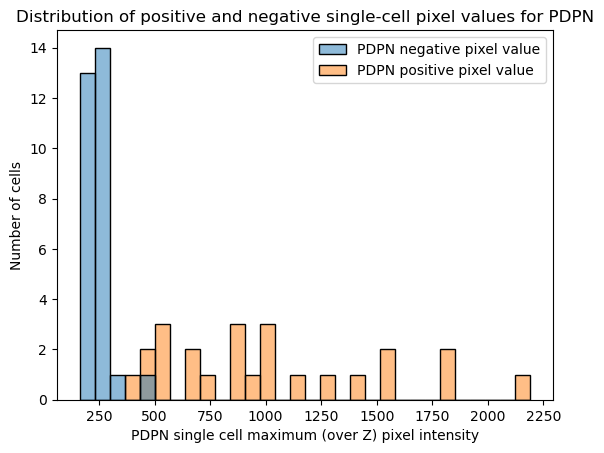

In [11]:
for channel in ['SPC', 'PDPN', 'NKX21']:
    neg = pd.read_csv(os.path.join(output_dir, f'{channel}_negative.csv'), names = [f'{channel} negative pixel value'])
    pos = pd.read_csv(os.path.join(output_dir, f'{channel}_positive.csv'), names = [f'{channel} positive pixel value'])
    df = pd.concat((neg, pos), axis = 1)
    
    ## plot
    plt.clf()
    sns.histplot(data = df, bins = 30,)
    plt.title(f'Distribution of positive and negative single-cell pixel values for {channel}')
    plt.xlabel(f'{channel} single cell maximum (over Z) pixel intensity')
    plt.ylabel('Number of cells')
    plt.savefig(os.path.join(output_dir, f'pos_neg_{channel}_pixel_distributions_{today}.jpg'), dpi = 314, bbox_inches = 'tight')

FileNotFoundError: [Errno 2] No such file or directory: '/home/dayn/data/lung_on_chip/pos_neg_dist/co-culture/iVECs+iAT2AT1/Folder_20220808/A2-A5/analysis_20221125/DAPI-SPC-PDPN-ZO1/_20220808_kolf-WT_co-culture_20x_A2-A5_Multichannel Z-Stack_20220808_60_/images/jakson/NKX21_negative.csv'

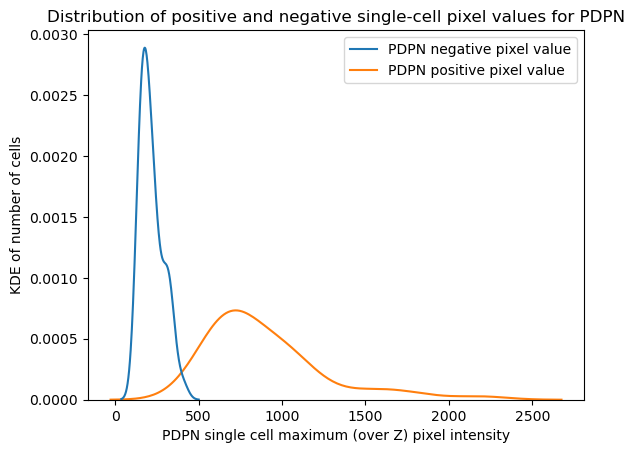

In [17]:
for channel in ['SPC', 'PDPN', 'NKX21']:
    neg = pd.read_csv(os.path.join(output_dir, f'{channel}_negative.csv'), names = [f'{channel} negative pixel value'])
    pos = pd.read_csv(os.path.join(output_dir, f'{channel}_positive.csv'), names = [f'{channel} positive pixel value'])
    df = pd.concat((neg, pos), axis = 1)
    
    ## plot
    plt.clf()
    sns.kdeplot(data = df, )
    plt.title(f'Distribution of positive and negative single-cell pixel values for {channel}')
    plt.xlabel(f'{channel} single cell maximum (over Z) pixel intensity')
    plt.ylabel('KDE of number of cells')
    plt.savefig(os.path.join(output_dir, f'kde_pos_neg_{channel}_pixel_distributions_{today}.jpg'), dpi = 314, bbox_inches = 'tight')

In [54]:
n_neg = pd.read_csv(os.path.join(output_dir, 'NKX21_negative.csv'), names = ['NKX21 negative pixel value'])
n_pos = pd.read_csv(os.path.join(output_dir, 'NKX21_positive.csv'), names = ['NKX21 positive pixel value'])
n_df = pd.concat((n_neg, n_pos), axis = 1)

In [55]:
len(n_neg), len(n_pos)

(29, 80)

In [59]:
len(n_neg) + len(n_pos)

109

In [62]:
channel = 'NKX21'

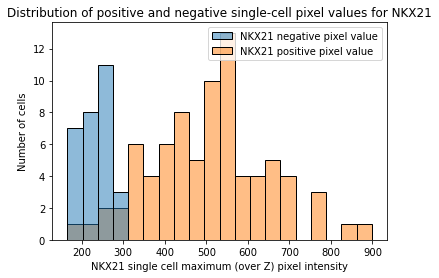

In [67]:
sns.histplot(data = n_df, bins = 20,)
plt.title('Distribution of positive and negative single-cell pixel values for NKX21')
plt.xlabel(f'{channel} single cell maximum (over Z) pixel intensity')
plt.ylabel('Number of cells')
plt.savefig(f'/home/dayn/data/lung_on_chip/pos_neg_dist/jakson/pos_neg_{channel}_pixel_distributions.jpg', dpi = 314, bbox_inches = 'tight')

<AxesSubplot:ylabel='Density'>

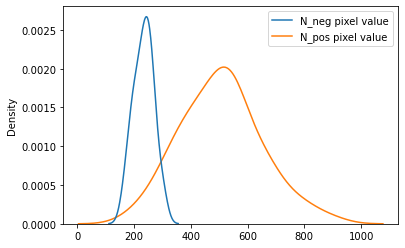

In [35]:
sns.kdeplot(data = n_df, )

In [36]:
p_neg = pd.read_csv(os.path.join(output_dir, 'PDPN_negative.csv'), names = ['P_neg pixel value'])
p_pos = pd.read_csv(os.path.join(output_dir, 'PDPN_positive.csv'), names = ['P_pos pixel value'])
df = pd.concat((n_df, p_neg, p_pos), axis = 1)
p_df = pd.concat((p_neg, p_pos), axis = 1)

In [39]:
df

,N_neg pixel value,N_pos pixel value,P_neg pixel value,P_pos pixel value
0,252.568562,676.533700,498.020440,1858.203343
1,234.146002,541.933555,393.039924,1223.695600
2,258.790747,501.675285,559.530484,1131.988450
3,239.588918,475.153814,563.582528,1147.556034
4,250.419774,834.134707,520.001151,1244.877167
...,...,...,...,...
179,NaN,NaN,621.265358,NaN
180,NaN,NaN,531.470891,NaN
181,NaN,NaN,521.331136,NaN
182,NaN,NaN,478.482827,NaN


In [32]:
len(p_neg), len(p_pos)

(184, 51)

<AxesSubplot:ylabel='Count'>

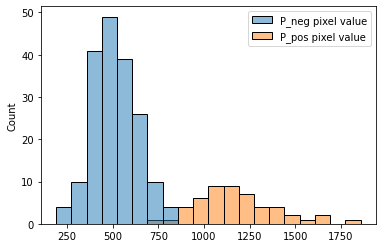

In [40]:
sns.histplot(data = p_df, bins=20)

<AxesSubplot:ylabel='Density'>

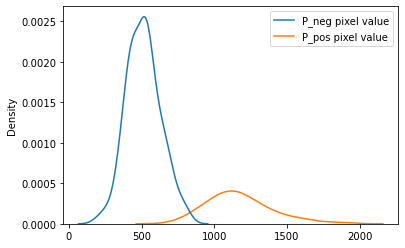

In [41]:
sns.kdeplot(data = p_df, )